# <b> Final Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

#Increase display resolution
mpl.rcParams['figure.dpi'] = 200

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
#prevents lines from being jagged
mpl.rcParams['lines.antialiased'] = True

#
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5

#I have no idea what this does
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1

mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
#defines the colors to cycle through when line colors are not specifically defined
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'DejaVu Serif'
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.labelpad'] = 9.0

# Title
mpl.rcParams['axes.titlepad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22

#default in mpl v2.0 is 'out'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.minor.visible'] = True

#Error bar plots
#default in mpl v2.0 is no caps on error bars
mpl.rcParams['errorbar.capsize'] = 3

# Legend
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation

# Figure size
mpl.rcParams['figure.figsize'] = 12, 8

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams['savefig.dpi'] = 200 #higher-res than default 100 dpi

In [3]:
from scipy.odr import *

In [4]:
concentrations = np.array([0.195, 0.0966, 0.0504, 0.0258, 0.01406, 0.0062])
uncertainities_concentrations = np.array([0.003, 0.0016, 0.0008, 0.00039, 0.00021, 0.000094])

t1_analysis = np.array([5.37, 10.418, 22.138, 37.059, 59.569, 138.984])
uncertainties_t1_analysis = np.array([0.035473, 0.10732, 0.12753, 0.53901, 1.3241, 1.5123])

t2_analysis = np.array([3.39, 9.5, 23.56, 38.43, 76.19, 183.87])
uncertainties_t2_analysis = np.array([0.13598, 0.23676, 0.90456, 1.2713, 4.41529, 29.307])

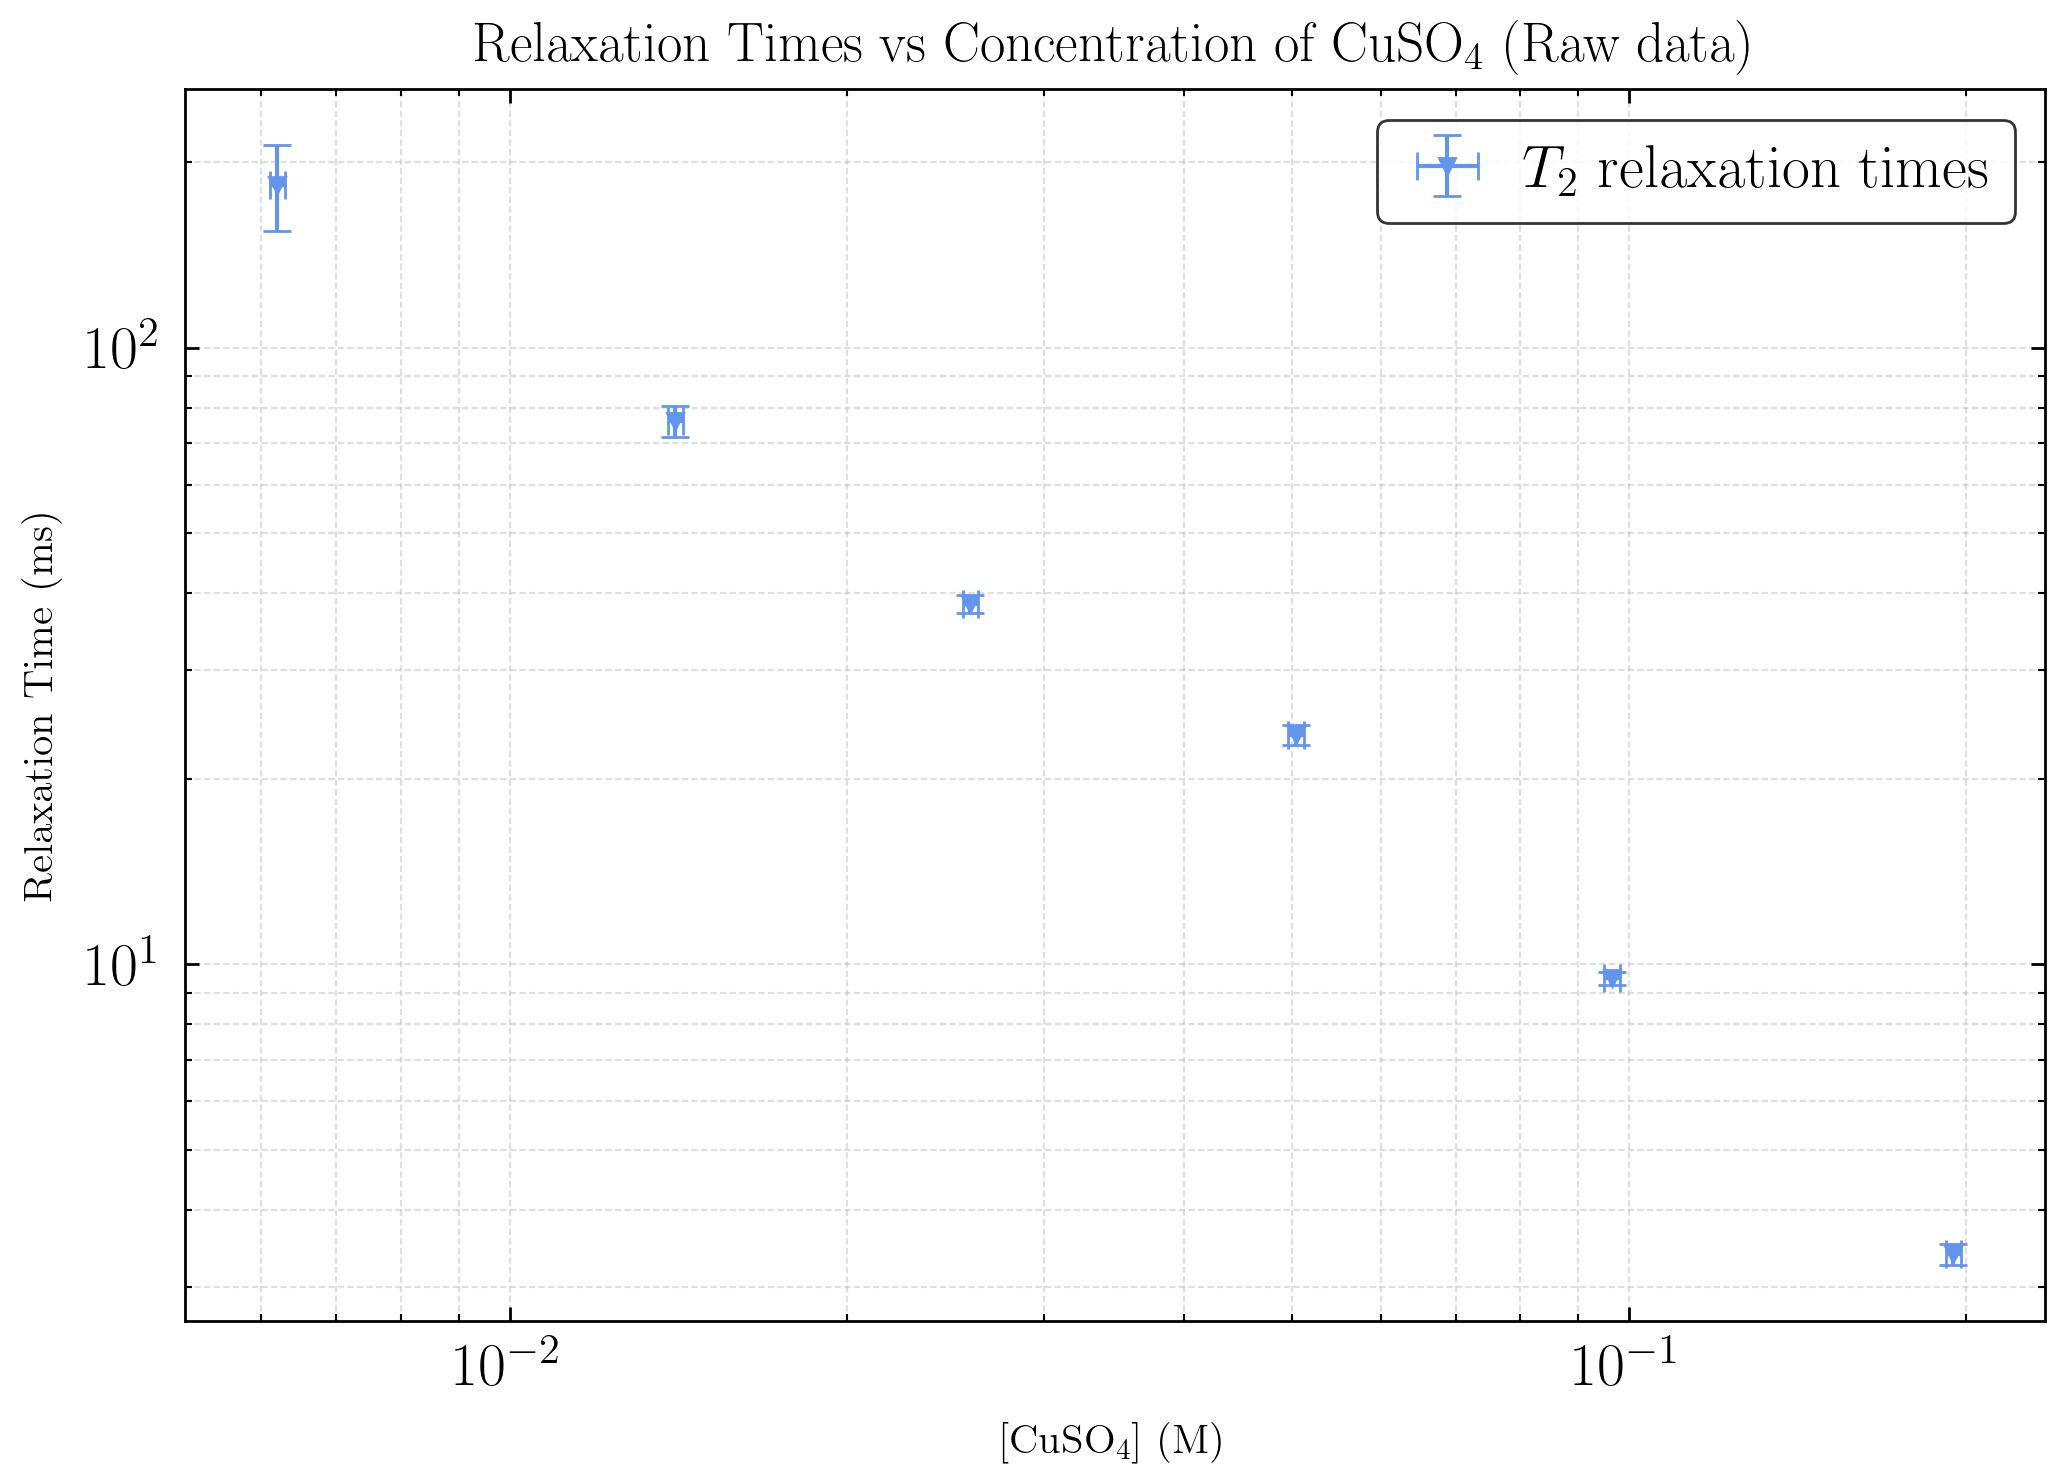

In [5]:
# plt.errorbar(concentrations, t1_analysis, xerr=uncertainities_concentrations, yerr=uncertainties_t1_analysis, fmt='o', label='$T_1$ relaxation times', capsize=5)
plt.errorbar(concentrations, t2_analysis, xerr=uncertainities_concentrations, yerr=uncertainties_t2_analysis, fmt='v', label='$T_2$ relaxation times', capsize=5)
plt.xlabel(r"[CuSO$_4$] (M)", fontsize = 15)
plt.ylabel('Relaxation Time (ms)', fontsize = 15)
plt.yscale('log')
plt.xscale('log')
plt.title(r'Relaxation Times vs Concentration of CuSO$_4$ (Raw data)', fontsize = 20)
plt.legend()
plt.grid(which='both', linestyle='--', alpha=0.4)
plt.savefig("../figures/t1_t2_vs_concentration_raw.png", dpi=300)

In [6]:
def f(beta, x):
    a, b = beta  # Extract parameters from the beta array
    return a * x + b

model = Model(f)
data = RealData(np.log(concentrations), np.log(t1_analysis), sx=np.log(uncertainities_concentrations), sy=np.log(uncertainties_t1_analysis))

odr = ODR(data, model, beta0=[-1, 5])
out = odr.run()

x_fit = np.linspace(np.log(concentrations[0]), np.log(concentrations[-1]), 100)
y_fit = f(out.beta, x_fit)  

out.pprint()

#calculate r squared    
y_model = f(out.beta, np.log(concentrations))
y_mean = np.mean(np.log(t1_analysis))
ss_total = np.sum((np.log(t1_analysis) - y_mean) ** 2)
ss_residual = np.sum((np.log(t1_analysis) - y_model) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(f"R-squared for T1: {r_squared}")

Beta: [-0.93672304  0.17737418]
Beta Std Error: [0.02780686 0.09122745]
Beta Covariance: [[ 6.89280819 21.26703164]
 [21.26703164 74.18966292]]
Residual Variance: 0.00011217799830321575
Inverse Condition #: 0.08645173790250753
Reason(s) for Halting:
  Sum of squares convergence
R-squared for T1: 0.996654512937165


In [29]:
model_1 = Model(f)
data_1 = RealData(np.log(concentrations), np.log(t2_analysis), sx=np.log(uncertainities_concentrations) , sy=np.log(np.abs(uncertainties_t2_analysis)))
odr_1 = ODR(data_1, model_1, beta0=[-1, 5])
out_1 = odr_1.run()
x_fit_1 = np.linspace(np.log(concentrations[0]), np.log(concentrations[-1]), 100)
y_fit_1 = f(out_1.beta, x_fit_1)

out_1.pprint()

# t2 r squared
y_model_1 = f(out_1.beta, np.log(concentrations))
y_mean_1 = np.mean(np.log(t2_analysis))
ss_total_1 = np.sum((np.log(t2_analysis) - y_mean_1) ** 2)
ss_residual_1 = np.sum((np.log(t2_analysis) - y_model_1) ** 2)
r_squared_1 = 1 - (ss_residual_1 / ss_total_1)
print(f"R-squared for T2: {r_squared_1}")

Beta: [-1.16350507 -0.55595847]
Beta Std Error: [0.06203981 0.19689843]
Beta Covariance: [[ 10.08727934  30.02490659]
 [ 30.02490659 101.60560079]]
Residual Variance: 0.0003815635480800206
Inverse Condition #: 0.09087817912520141
Reason(s) for Halting:
  Sum of squares convergence
R-squared for T2: 0.9893894307717166


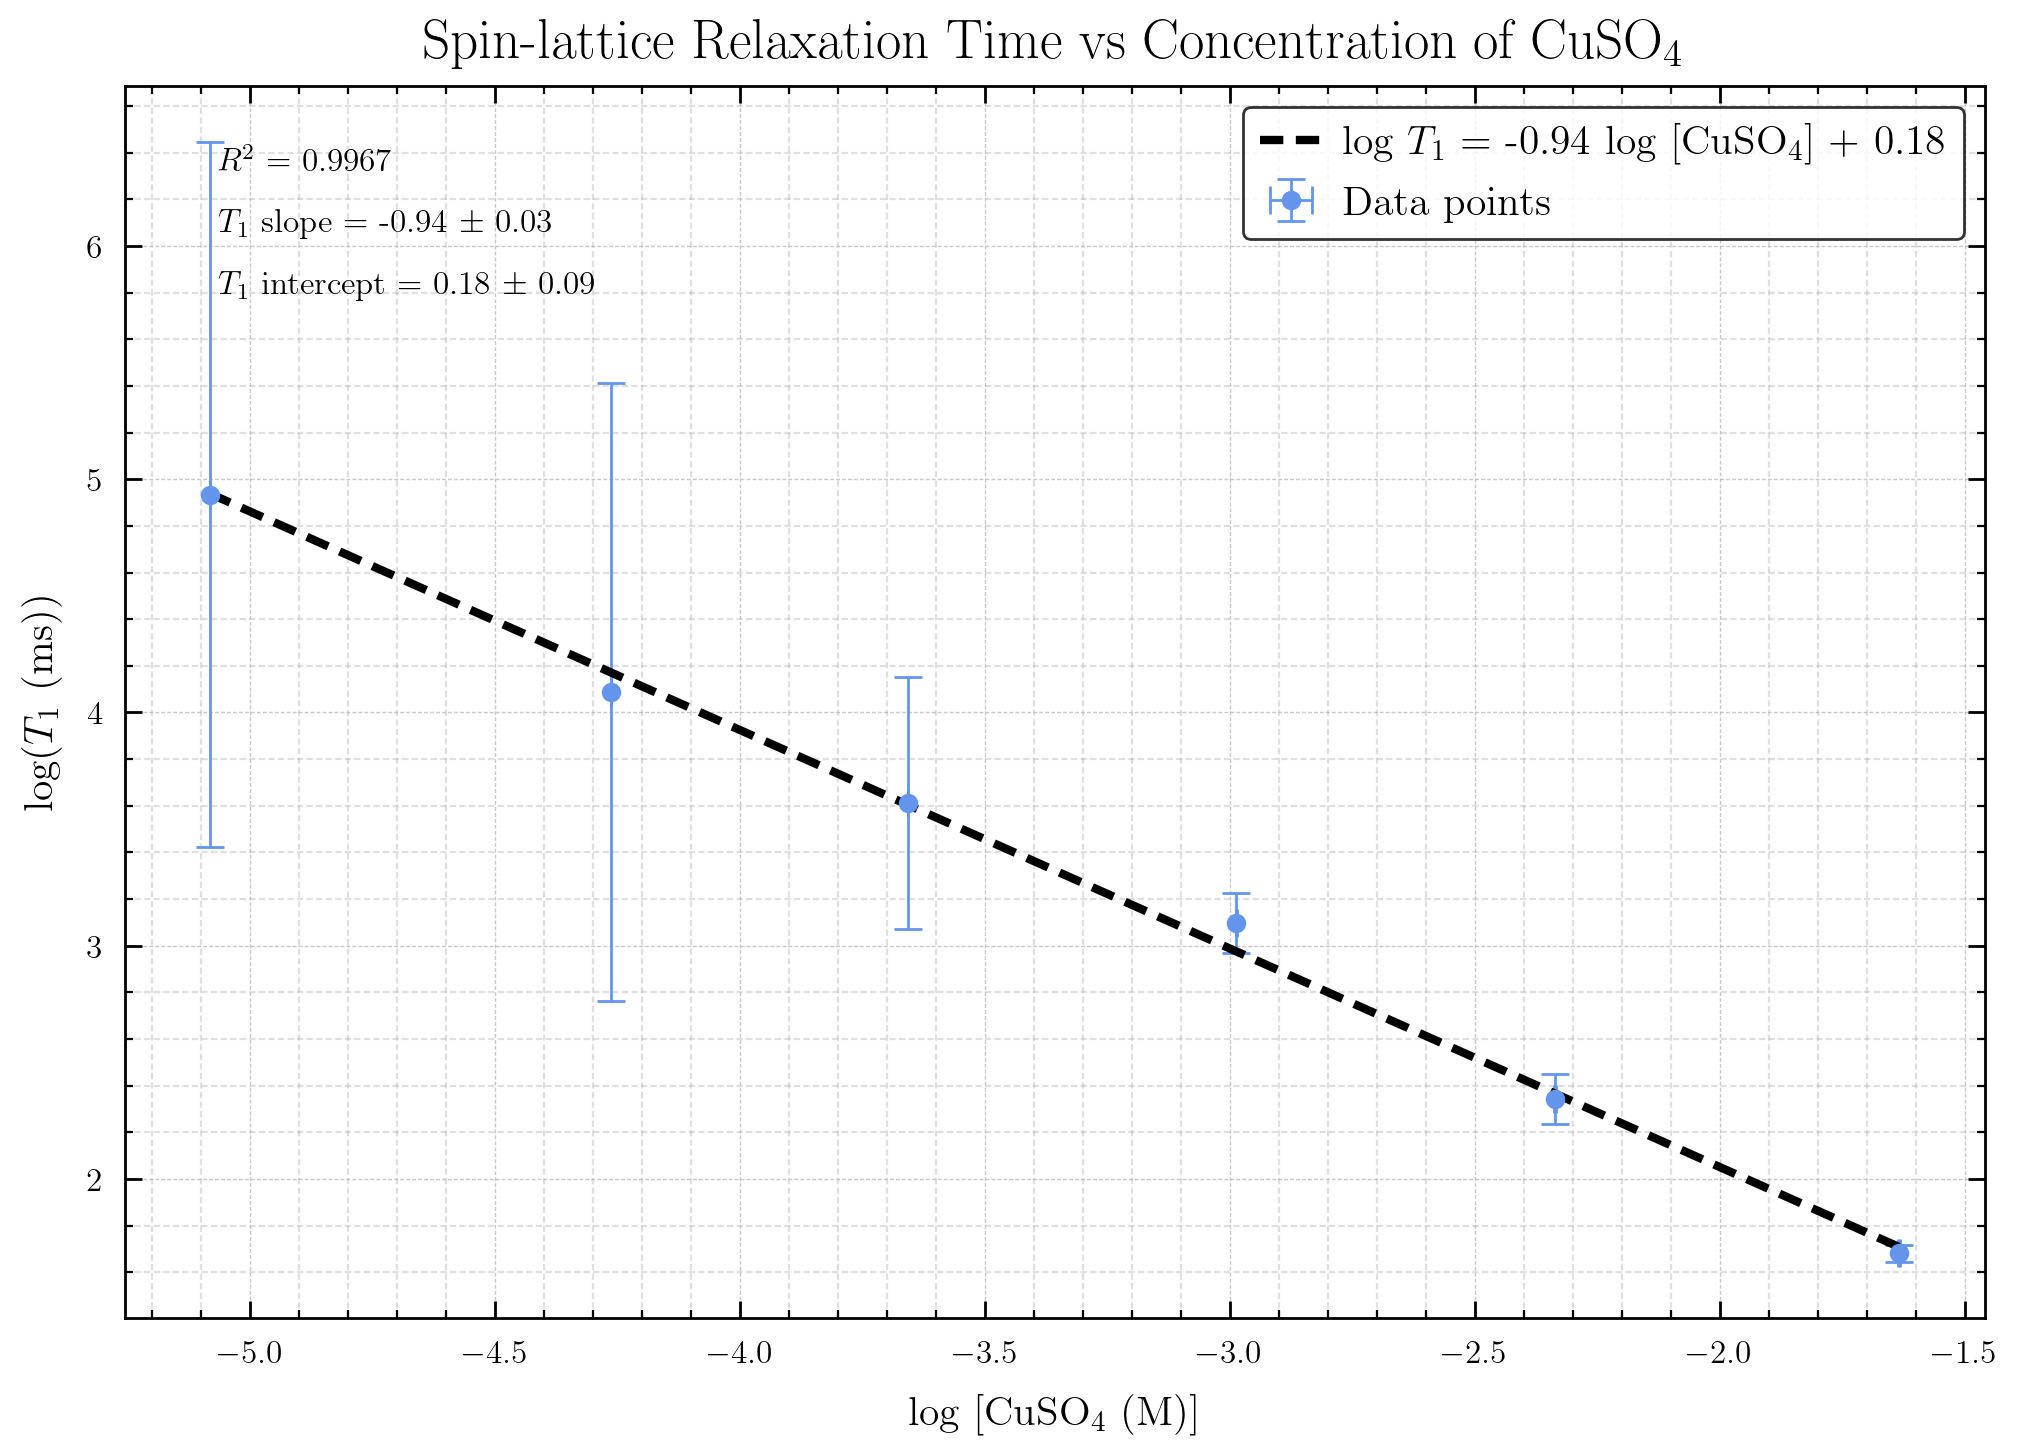

In [30]:
plt.errorbar(np.log(concentrations), np.log(t1_analysis), xerr=uncertainities_concentrations, yerr=uncertainties_t1_analysis, fmt='o', label='Data points', capsize=5, elinewidth=1, markeredgewidth=1)
plt.plot(x_fit, y_fit, 'k--', lw = 3, label=r'log $T_1$ = {:.2f} log [CuSO$_4$] + {:.2f}'.format(out.beta[0],  out.beta[1]))

plt.xlabel('log [CuSO$_4$ (M)]', fontsize = 15)
plt.ylabel('log($T_1$ (ms))', fontsize = 15)
plt.title('Spin-lattice Relaxation Time vs Concentration of CuSO$_4$', fontsize=20)
plt.grid(which='both', linestyle='--', alpha=0.4)
plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, r'$T_1$ slope = {:.2f} $\pm$ {:.2f}'.format(out.beta[0], out.sd_beta[0]), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, r'$T_1$ intercept = {:.2f} $\pm$ {:.2f}'.format(out.beta[1], out.sd_beta[1]), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
# plt.

# plt.style.use('seaborn-v0_8-whitegrid')

# fig, ax = plt.subplots(figsize=(7,5))

# ax.errorbar(np.log(concentrations), np.log(t1_analysis), 
#             xerr=uncertainities_concentrations, 
#             yerr=uncertainties_t1_analysis, 
#             fmt='o', label=r'$T_1$ Data', capsize=5, elinewidth=1, markeredgewidth=1, color='cornflowerblue')

# # Fit line with confidence band
# ax.plot(x_fit, y_fit, '--', color='black', linewidth=1.5, label=r'Fit')
# plt.fill_between(x_fit, y_fit - 1.96*out.sd_beta[1], y_fit + 1.96*out.sd_beta[1], color='gray', alpha=0.3, label='95% Confidence Interval')

# # Labels
# ax.set_xlabel(r'$\log [\mathrm{CuSO}_4] \, (\mathrm{M})$', fontsize=14, fontweight='bold')
# ax.set_ylabel(r'$\log (T_1 \,  \, \mathrm{ms})$', fontsize=14, fontweight='bold')

# # Legend
# ax.legend(frameon=True, fontsize=12)
plt.legend(fontsize = 15)
# Grid + ticks
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.tick_params(direction='in', length=6, width=1, labelsize=12)
plt.tick_params(which='minor', direction='in', length=3, width=0.8)
plt.savefig("../figures/t1_vs_concentration_fit.png", dpi=300)

$T_1 = \dfrac{1.03}{[CuSO_4]^{1.01}}$

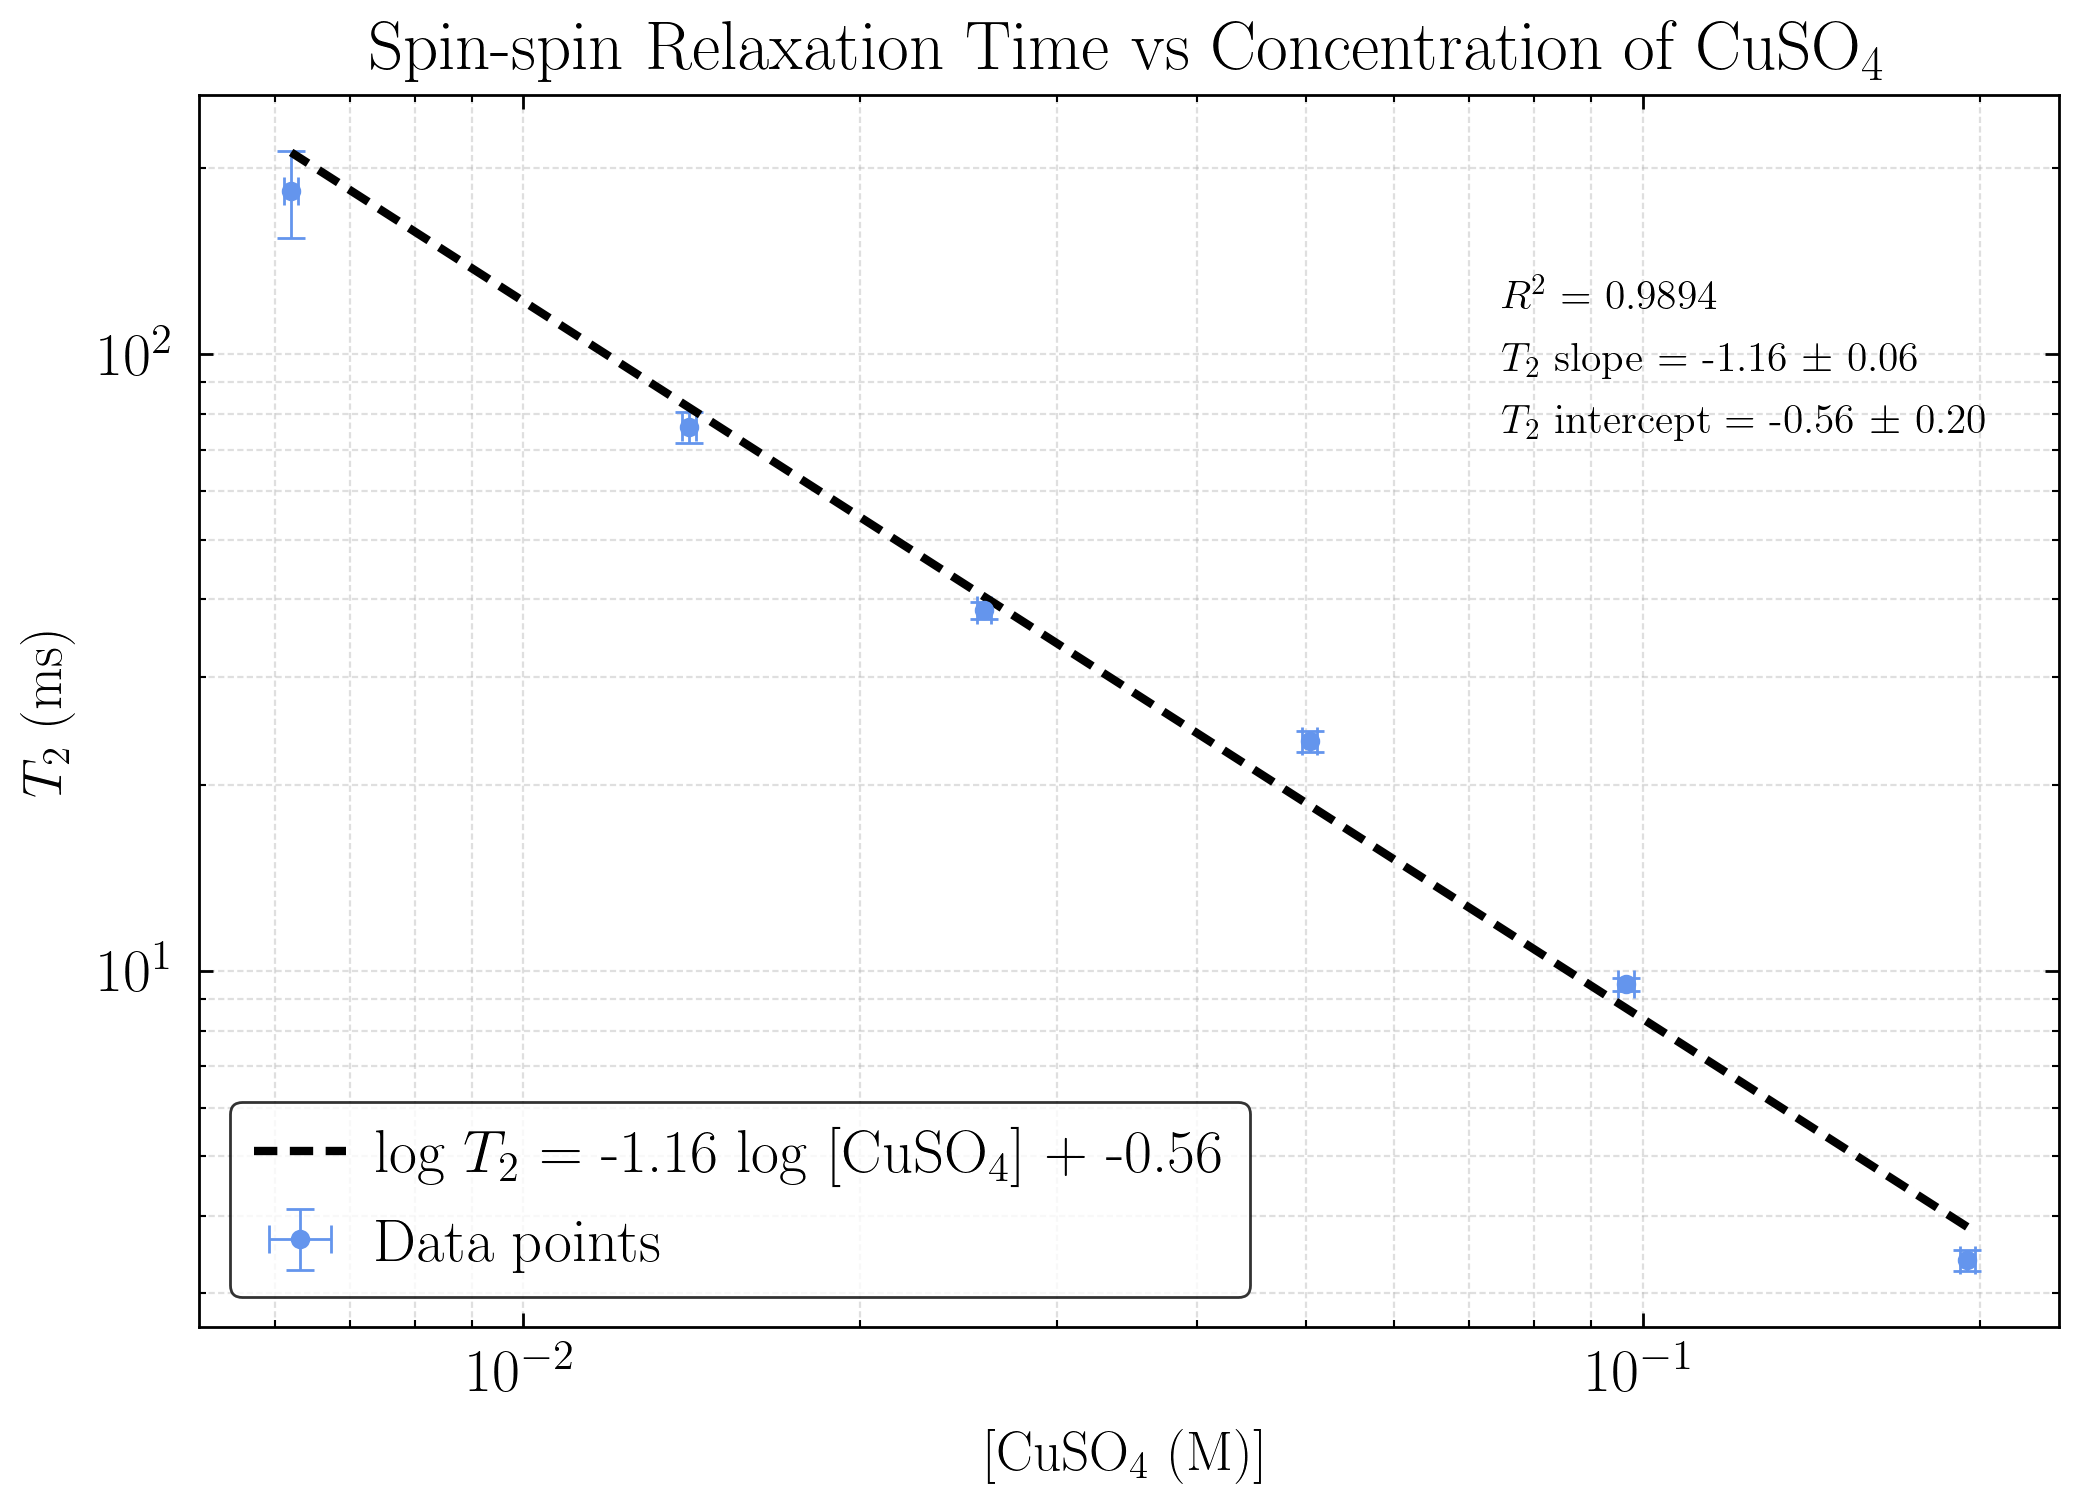

<Figure size 2400x1600 with 0 Axes>

In [48]:
plt.errorbar(10**np.log10(concentrations),10**np.log10(t2_analysis), xerr=uncertainities_concentrations, yerr=uncertainties_t2_analysis, fmt='o', label='Data points', capsize=5, elinewidth=1, markeredgewidth=1)
plt.plot(np.exp(x_fit_1), np.exp(y_fit_1), 'k--', lw = 3, label=r'log $T_2$ = {:.2f} log [CuSO$_4$] + {:.2f}'.format(out_1.beta[0],  out_1.beta[1]))
plt.grid(which='both', linestyle='--', alpha=0.4)
plt.text(0.7, 0.85, f'$R^2$ = {r_squared_1:.4f}', transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')
plt.text(0.7, 0.80, r'$T_2$ slope = {:.2f} $\pm$ {:.2f}'.format(out_1.beta[0], out_1.sd_beta[0]), transform=plt.gca().transAxes, fontsize=15, verticalalignment='top')
plt.text(0.7, 0.75, r'$T_2$ intercept = {:.2f} $\pm$ {:.2f}'.format(out_1.beta[1], out_1.sd_beta[1]), transform=plt.gca().transAxes, fontsize=15, verticalalignment='top') 
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('[CuSO$_4$ (M)]', fontsize = 20)
plt.ylabel('$T_2$ (ms)', fontsize = 20)
plt.title('Spin-spin Relaxation Time vs Concentration of CuSO$_4$', fontsize=25)
plt.show()
plt.savefig("../figures/t2_vs_concentration_fit.png", dpi=1000)

$T_2 = \dfrac{0.3499}{[CuSO_4]^{1.40}}$

Beta: [-11.27583695   3.41044925]
Beta Std Error: [0.84592444 0.14610374]
Beta Covariance: [[ 6.33972369 -1.05313739]
 [-1.05313739  0.1891167 ]]
Residual Variance: 0.11287371498915524
Inverse Condition #: 0.042120390708592394
Reason(s) for Halting:
  Sum of squares convergence
R-squared for T2 linear: 0.5079724106754362


Text(0.5, 1.0, 'Spin-spin Relaxation Time vs Concentration of CuSO$_4$')

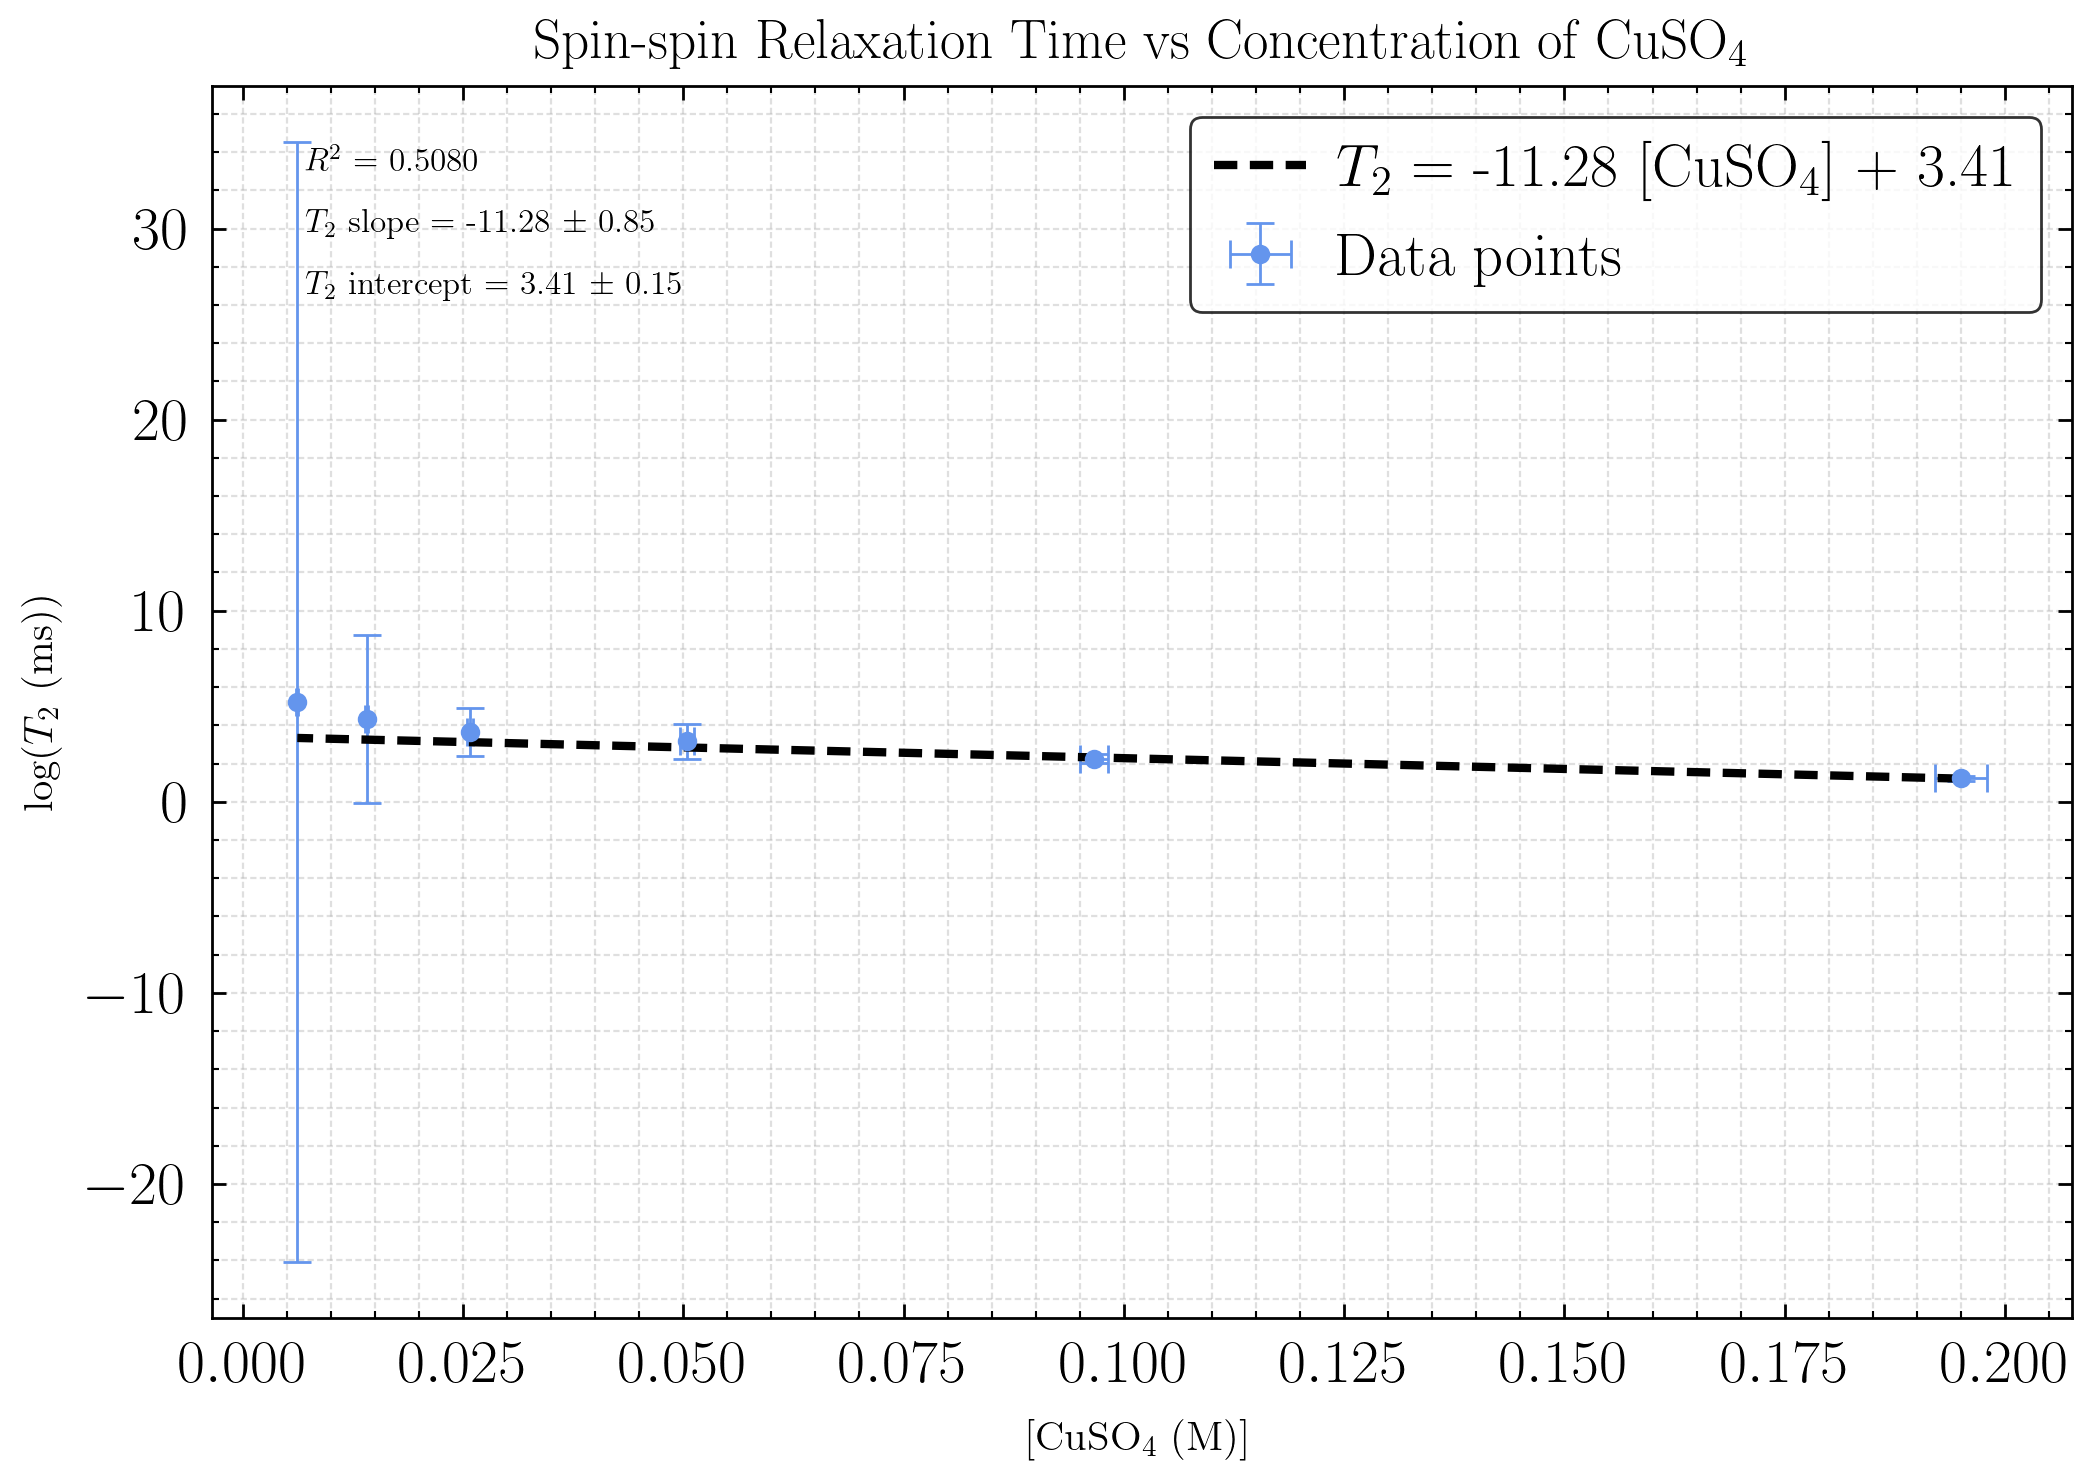

In [10]:
model_2 = Model(f)
data_2 = RealData(concentrations, np.log(t2_analysis), sx=uncertainities_concentrations, sy=uncertainties_t2_analysis) 
odr_2 = ODR(data_2, model_2, beta0=[-1, 5]) 
out_2 = odr_2.run()
x_fit_2 = np.linspace(concentrations[0], concentrations[-1], 100)
y_fit_2 = f(out_2.beta, x_fit_2)
out_2.pprint()
# t2 r squared
y_model_2 = f(out_2.beta, concentrations)
y_mean_2 = np.mean(np.log(t2_analysis))
ss_total_2 = np.sum((np.log(t2_analysis) - y_mean_2) ** 2)
ss_residual_2 = np.sum((np.log(t2_analysis) - y_model_2) ** 2)
r_squared_2 = 1 - (ss_residual_2 / ss_total_2)
print(f"R-squared for T2 linear: {r_squared_2}")
plt.errorbar(concentrations, np.log(t2_analysis), xerr=uncertainities_concentrations, yerr=uncertainties_t2_analysis, fmt='o', label='Data points', capsize=5, elinewidth=1, markeredgewidth=1)
plt.plot(x_fit_2, y_fit_2, 'k--', lw = 3, label=r'$T_2$ = {:.2f} [CuSO$_4$] + {:.2f}'.format(out_2.beta[0],  out_2.beta[1]))
plt.grid(which='both', linestyle='--', alpha=0.4)
plt.text(0.05, 0.95, f'$R^2$ = {r_squared_2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, r'$T_2$ slope = {:.2f} $\pm$ {:.2f}'.format(out_2.beta[0], out_2.sd_beta[0]), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, r'$T_2$ intercept = {:.2f} $\pm$ {:.2f}'.format(out_2.beta[1], out_2.sd_beta[1]), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.legend()
plt.xlabel('[CuSO$_4$ (M)]', fontsize = 15)
plt.ylabel('log($T_2$ (ms))', fontsize = 15)
plt.title('Spin-spin Relaxation Time vs Concentration of CuSO$_4$', fontsize=20)

Beta: [ 3.27645564 -0.20151864]
Beta Std Error: [0.42870311 0.04296181]
Beta Covariance: [[ 0.08251569 -0.00675197]
 [-0.00675197  0.00082868]]
Residual Variance: 2.2272897683169286
Inverse Condition #: 0.05617797479835291
Reason(s) for Halting:
  Sum of squares convergence
R-squared for log(T1/T2) linear: 0.9280124992180958


KeyError: 'T_1'

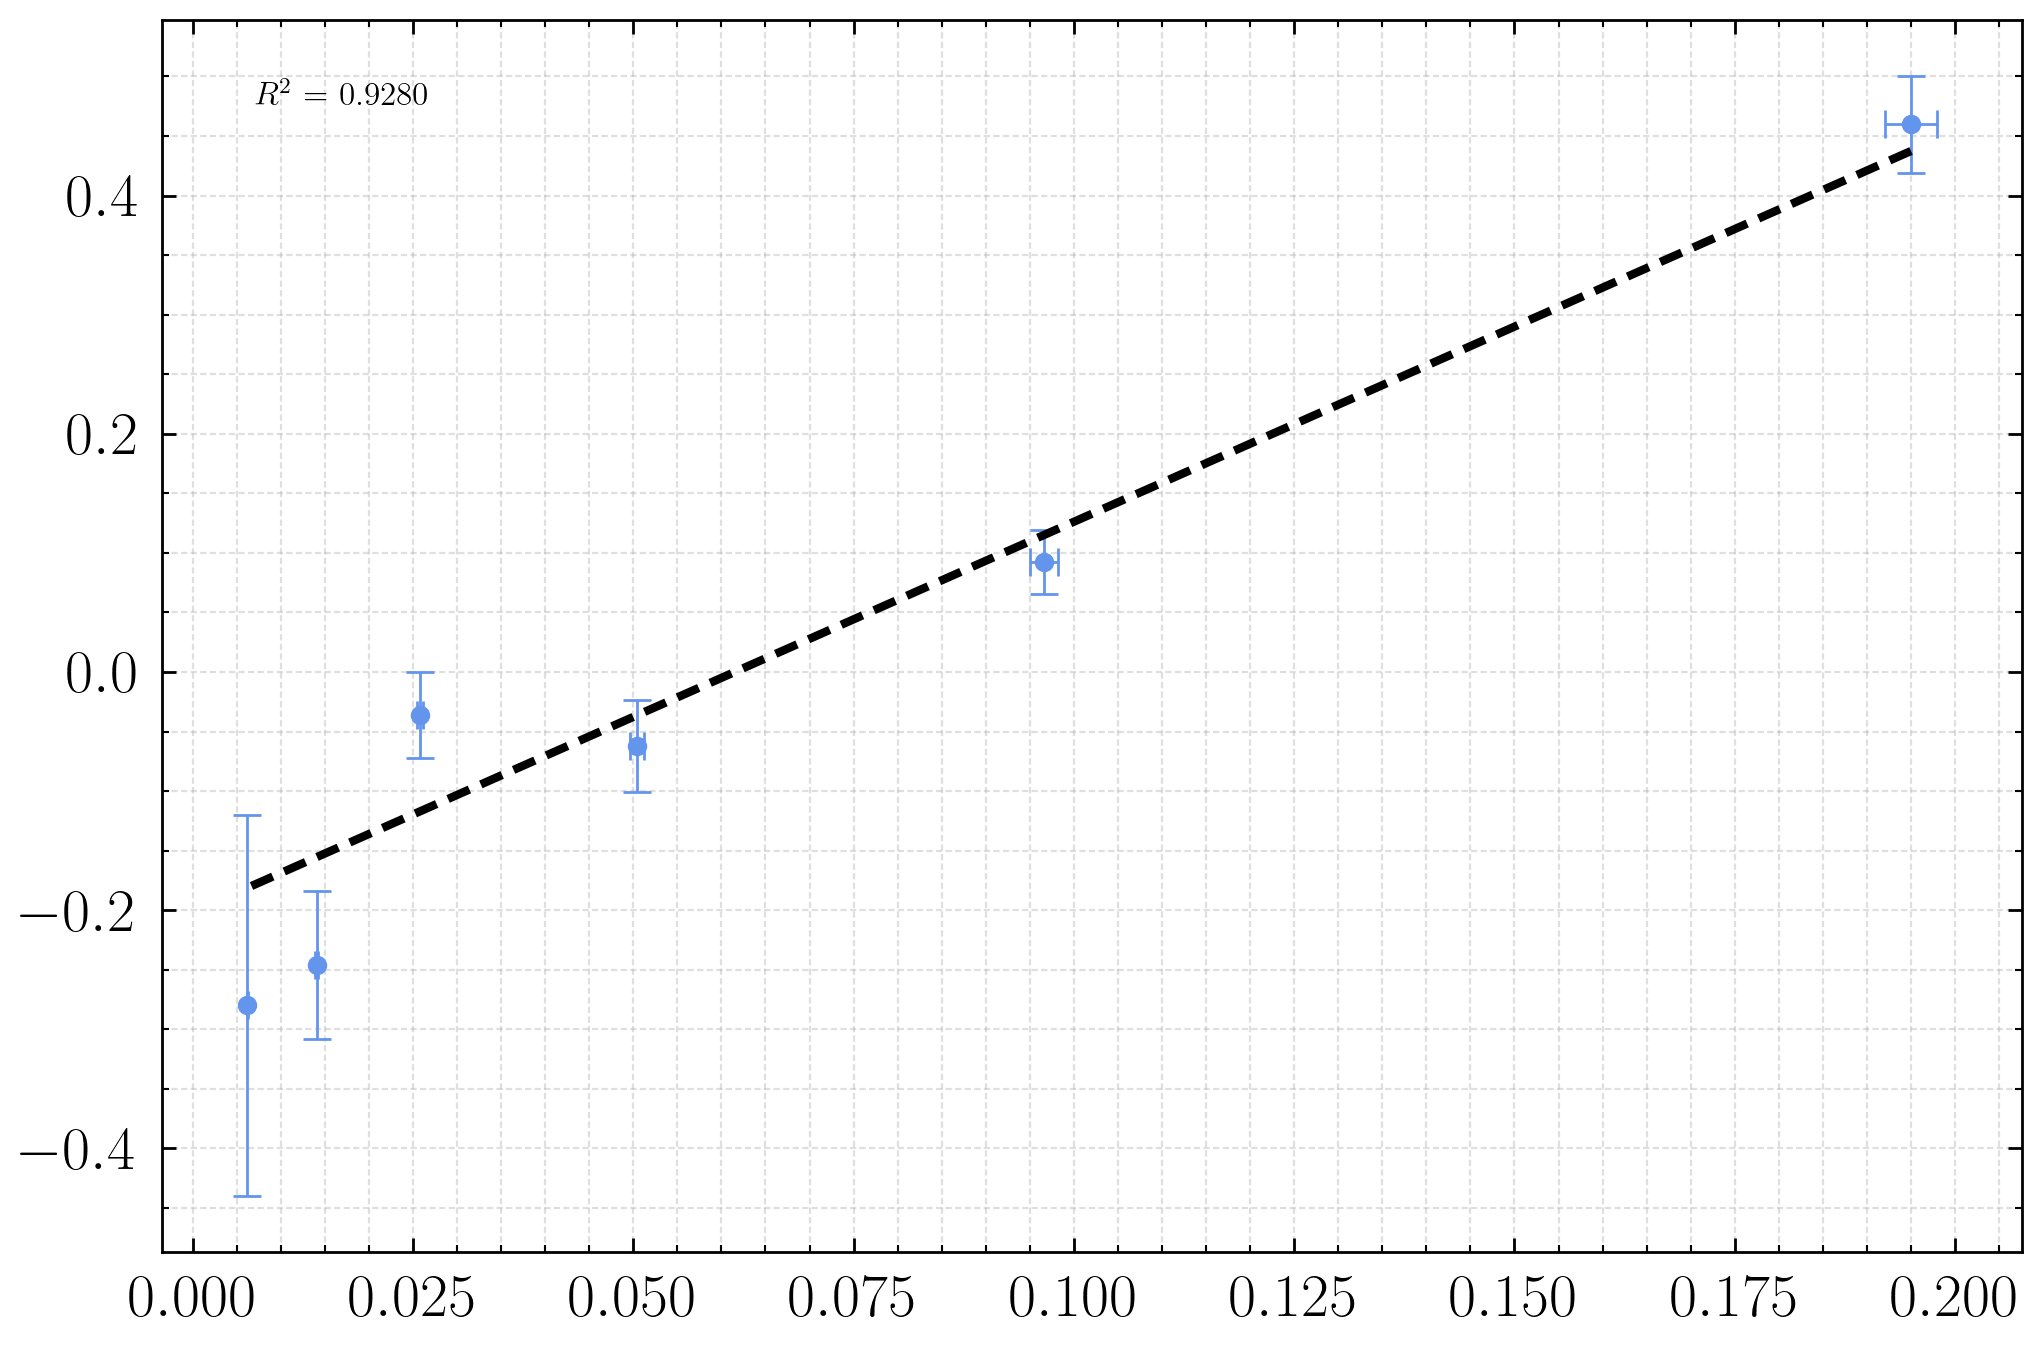

In [11]:
model_3 = Model(f)
# log (T1/T2) vs Concentration
data_3 = RealData(concentrations, np.log(t1_analysis/t2_analysis), sx=uncertainities_concentrations, sy=np.sqrt((uncertainties_t1_analysis/t1_analysis)**2 + (uncertainties_t2_analysis/t2_analysis)**2))
odr_3 = ODR(data_3, model_3, beta0=[-1, 5])
out_3 = odr_3.run()
x_fit_3 = np.linspace(concentrations[0], concentrations[-1], 100)
y_fit_3 = f(out_3.beta, x_fit_3)
out_3.pprint()
# t2 r squared
y_model_3 = f(out_3.beta, concentrations)
y_mean_3 = np.mean(np.log(t1_analysis/t2_analysis))
ss_total_3 = np.sum((np.log(t1_analysis/t2_analysis) - y_mean_3) ** 2)
ss_residual_3 = np.sum((np.log(t1_analysis/t2_analysis) - y_model_3) ** 2)
r_squared_3 = 1 - (ss_residual_3 / ss_total_3)
print(f"R-squared for log(T1/T2) linear: {r_squared_3}")
plt.errorbar(concentrations, np.log(t1_analysis/t2_analysis), xerr=uncertainities_concentrations, yerr=np.sqrt((uncertainties_t1_analysis/t1_analysis)**2 + (uncertainties_t2_analysis/t2_analysis)**2), fmt='o', label='Data points', capsize=5, elinewidth=1, markeredgewidth=1)
#plt.plot(x_fit_3, y_fit_3, 'k--', lw = 3, label=r'log $\frac{T_1}{T_2}$ = {:.2f} [CuSO$_4$] + {:.2f}'.format(out_3.beta[0],  out_3.beta[1]))
plt.plot(
    x_fit_3,
    y_fit_3,
    'k--',
    lw=3,
    #label=r'log $\frac{T_1}{T_2}$ = {:.2f} [CuSO$_4$] + {:.2f}'.format(out_3.beta[0], out_3.beta[1])
)
plt.grid(which='both', linestyle='--', alpha=0.4)
plt.text(0.05, 0.95, f'$R^2$ = {r_squared_3:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, r'log $\frac{T_1}{T_2}$ slope = {:.2f} $\pm$ {:.2f}'.format(out_3.beta[0], out_3.sd_beta[0]), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, r'log $\frac{T_1}{T_2}$ intercept = {:.2f} $\pm$ {:.2f}'.format(out_3.beta[1], out_3.sd_beta[1]), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.legend()
plt.xlabel('log[CuSO$_4$ (M)]', fontsize = 15)
plt.ylabel('log($T_1/T_2$)', fontsize = 15)
plt.title('Ratio of Spin-lattice to Spin-spin Relaxation Times vs Concentration of CuSO$_4$', fontsize=20)
